model agnostic

In [1]:
# !pip install pip install -U pyartemis

In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from time import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 56 seconds
Elapsed time to compute Full process: 2 minutes and 11 seconds


In [4]:
# drop rows where 'YEAR MMS' is 1 or 10
data = data[data['YEAR MMS'] != 1]
data = data[data['YEAR MMS'] != 10]

In [5]:
# drop column YEAR MMS
data = data.drop(columns=['YEAR MMS'])

In [6]:
data = pd.get_dummies(data)

In [7]:
# Splitting the data into X and y
X = data[(data['outcome'] == 1) | (data['outcome'] == 2)].drop('outcome',axis=1)
X.columns = [str(col) for col in X.columns]
y = data[(data['outcome'] == 1) | (data['outcome'] == 2)]['outcome']

In [8]:
# Balancing the data using SMOTE
X, y = smote(X, y)

y_train: 
2    4698
1    4698
Name: outcome, dtype: int64
Elapsed time to compute oversampling using SMOTE: 0 minutes and 0 seconds


In [9]:
# RF model
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X, y)

RandomForestClassifier(class_weight='balanced')

Fedmans H Statistics

In [10]:
# Get random selection of 100 observations

random.seed(42)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

Unnormalised H-Statistic

In [11]:
h_stat_unnormalised = FriedmanHStatisticMethod(normalized=False)
t1 = time()
h_stat_unnormalised.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic unnormalised'))

Calculating one vs all interactions: 100%|██████████| 333/333 [11:56<00:00,  2.15s/it]

Elapsed time to compute Friedman H Statistic unnormalised: 44 minutes and 12 seconds


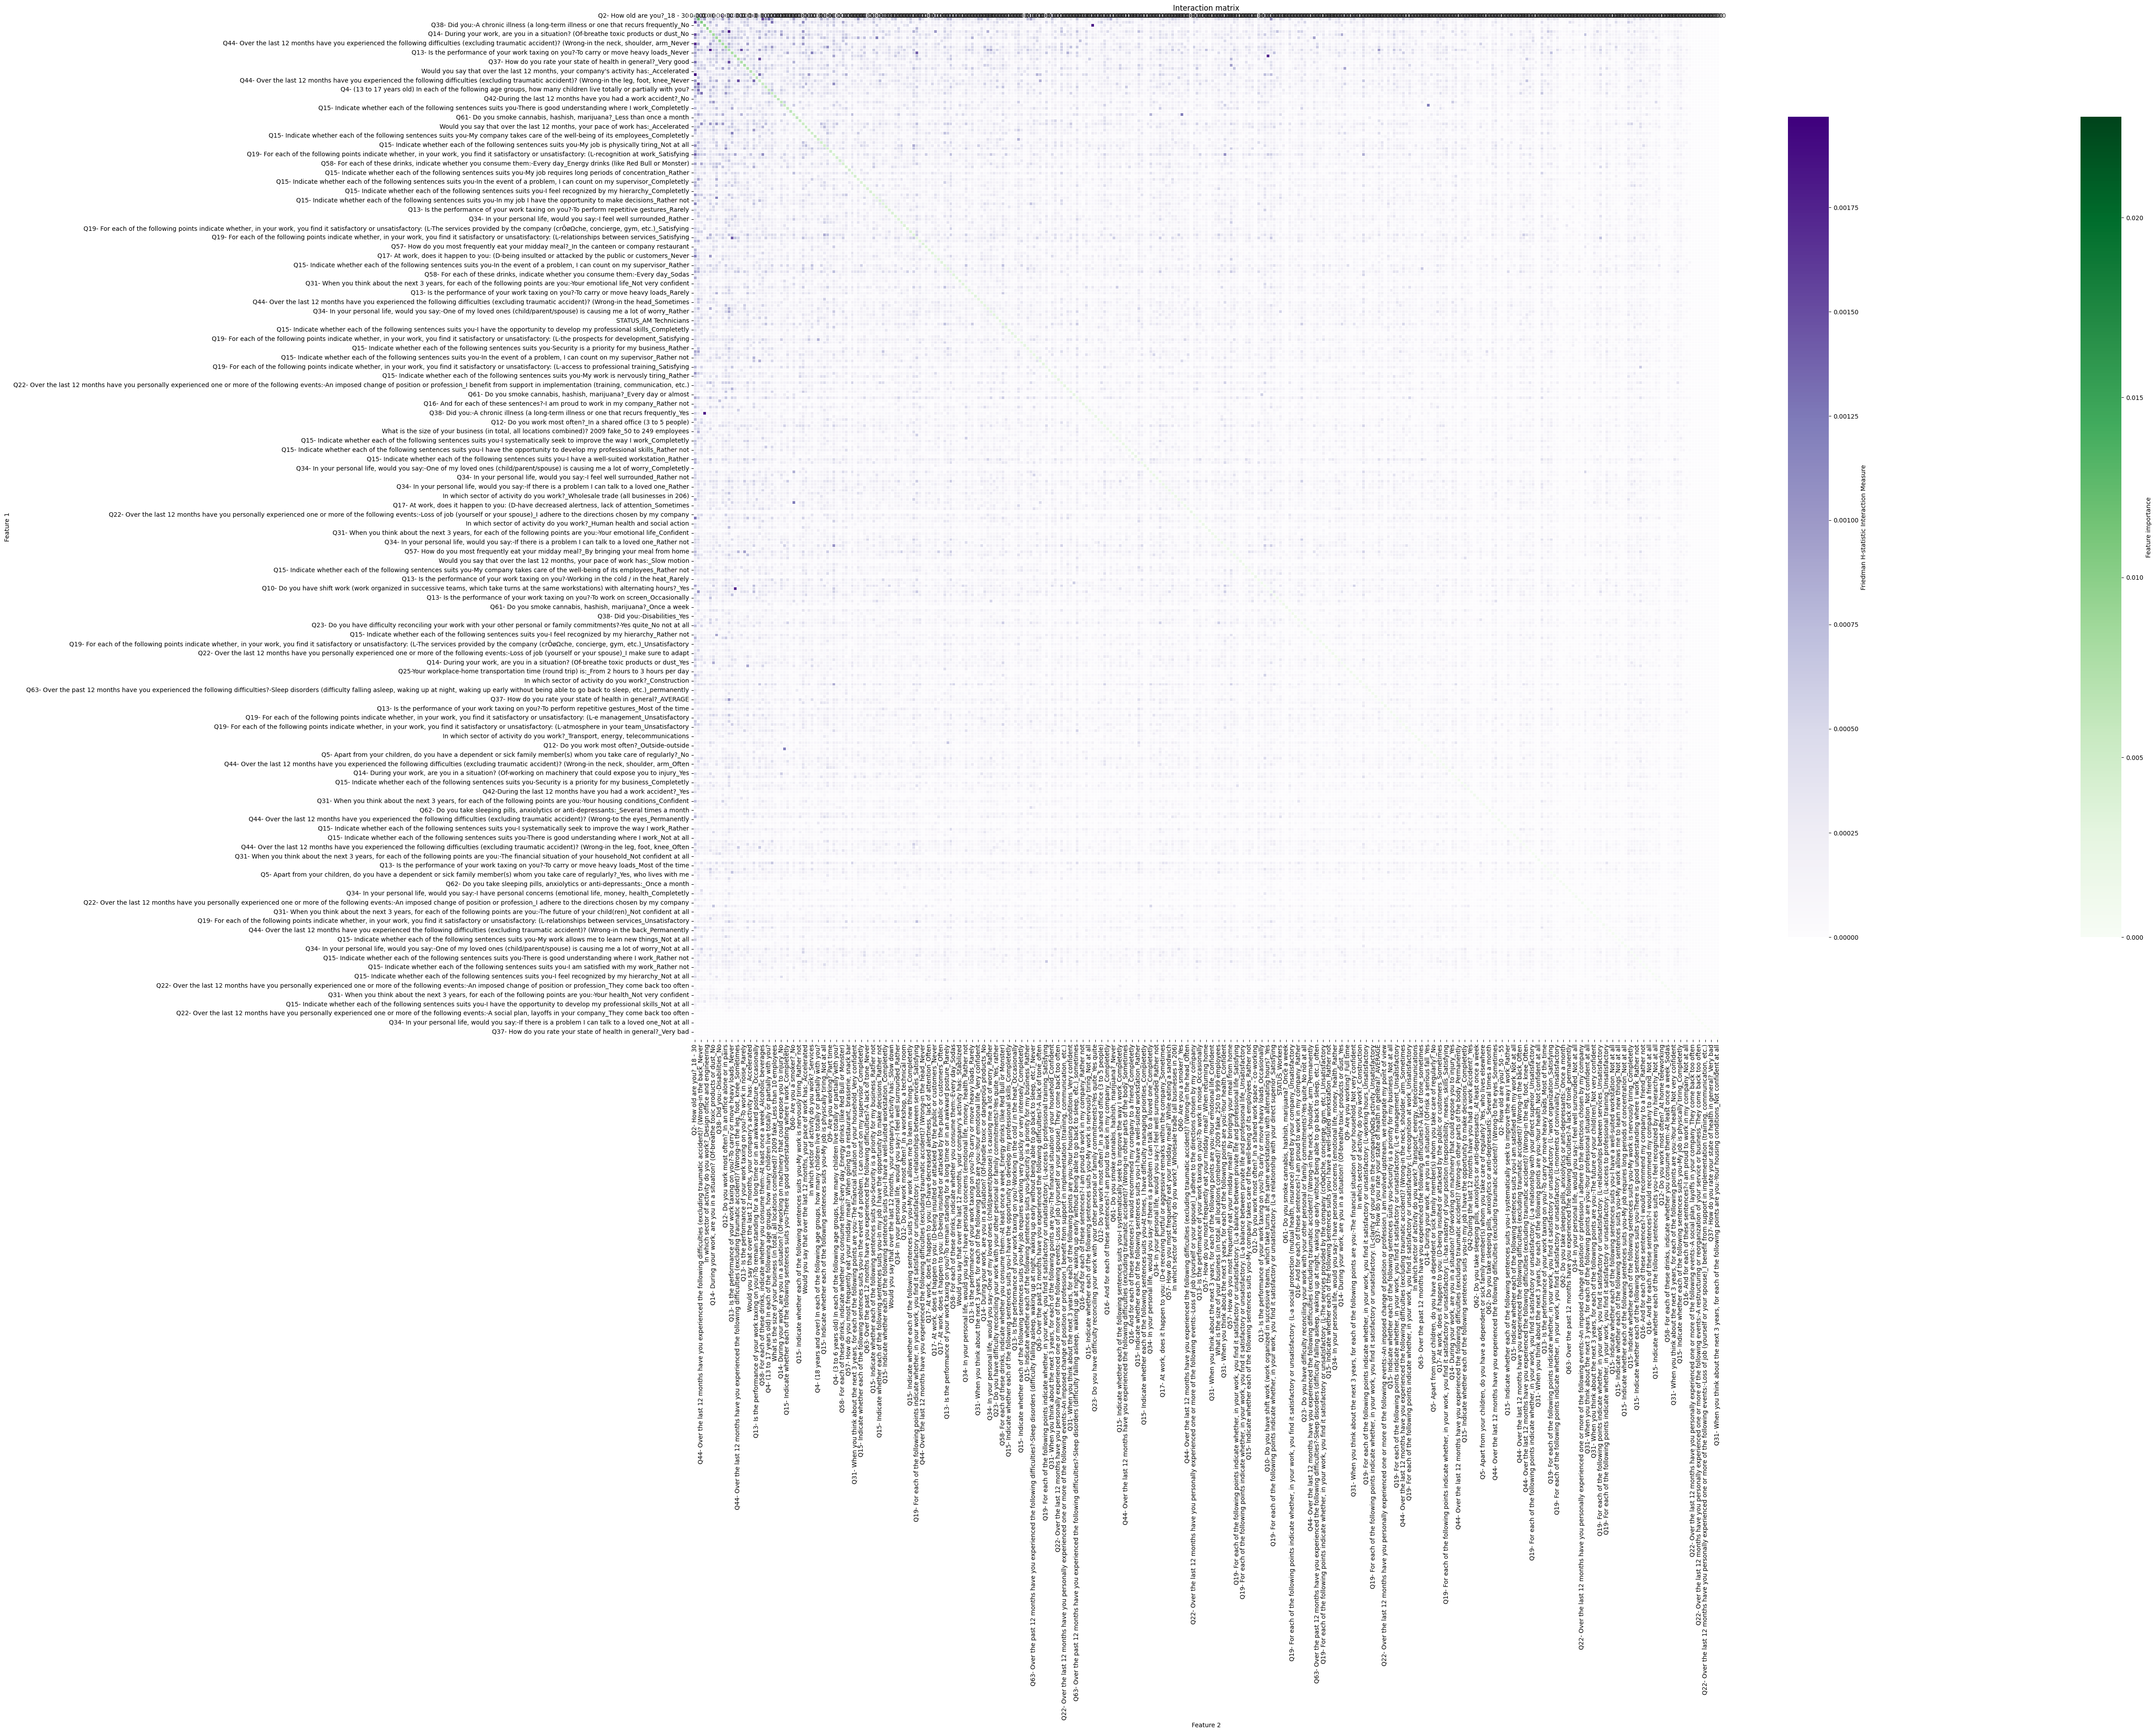

In [12]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(50, 30))
h_stat_unnormalised.plot(ax=ax)

# save the plot
fig.savefig('outputs/01_02_12_hStat/hStat_heatmap_unnormalised.png', bbox_inches='tight')

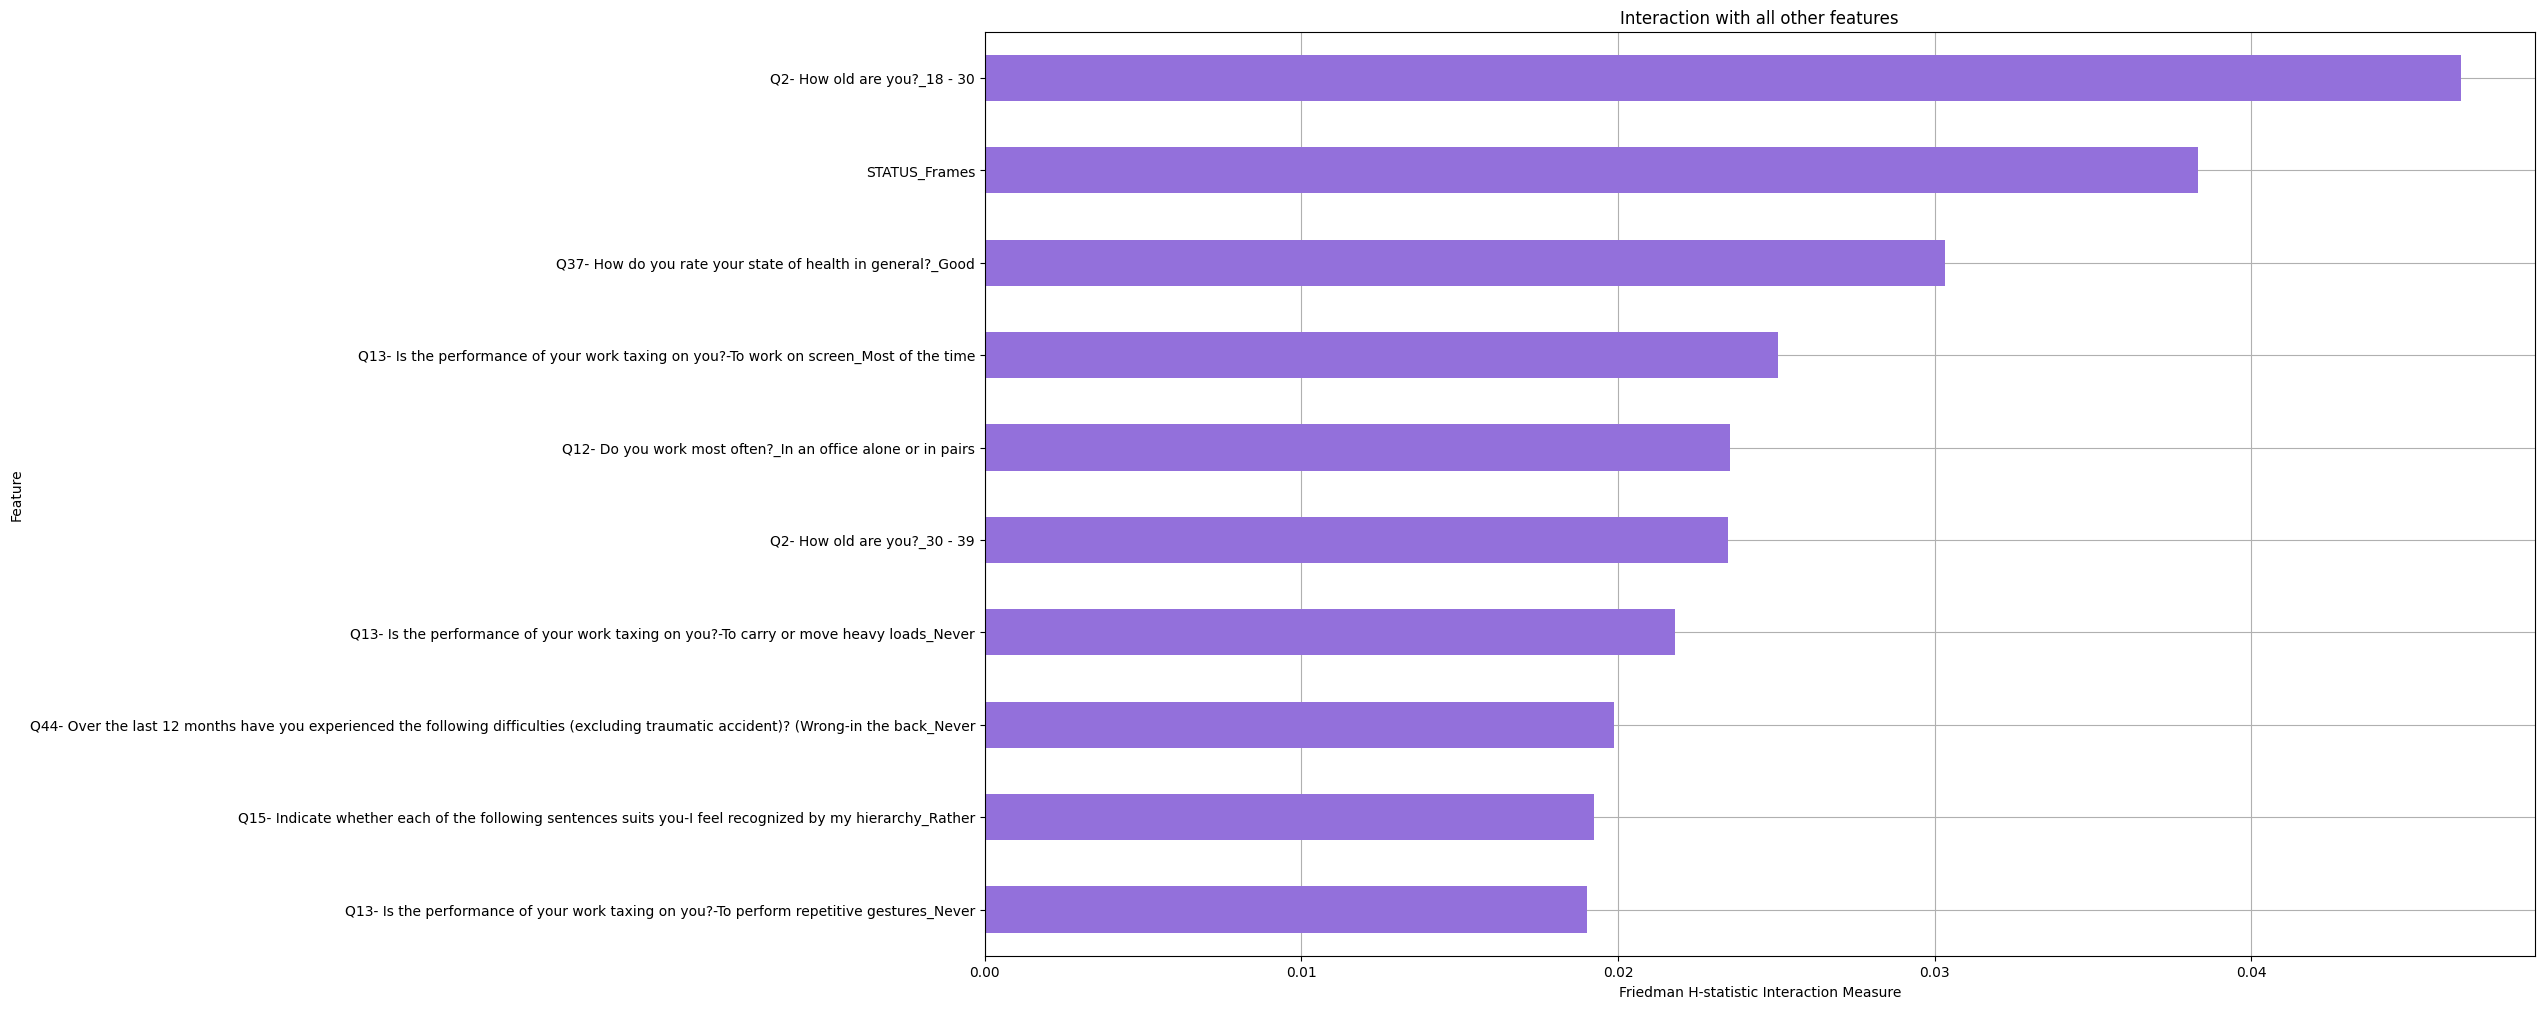

In [13]:
# Plot overall interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart_ova', ax=ax)

# save the plot
plt.savefig('outputs/01_02_12_hStat/overall_interactions_unnormalised.png', bbox_inches='tight')

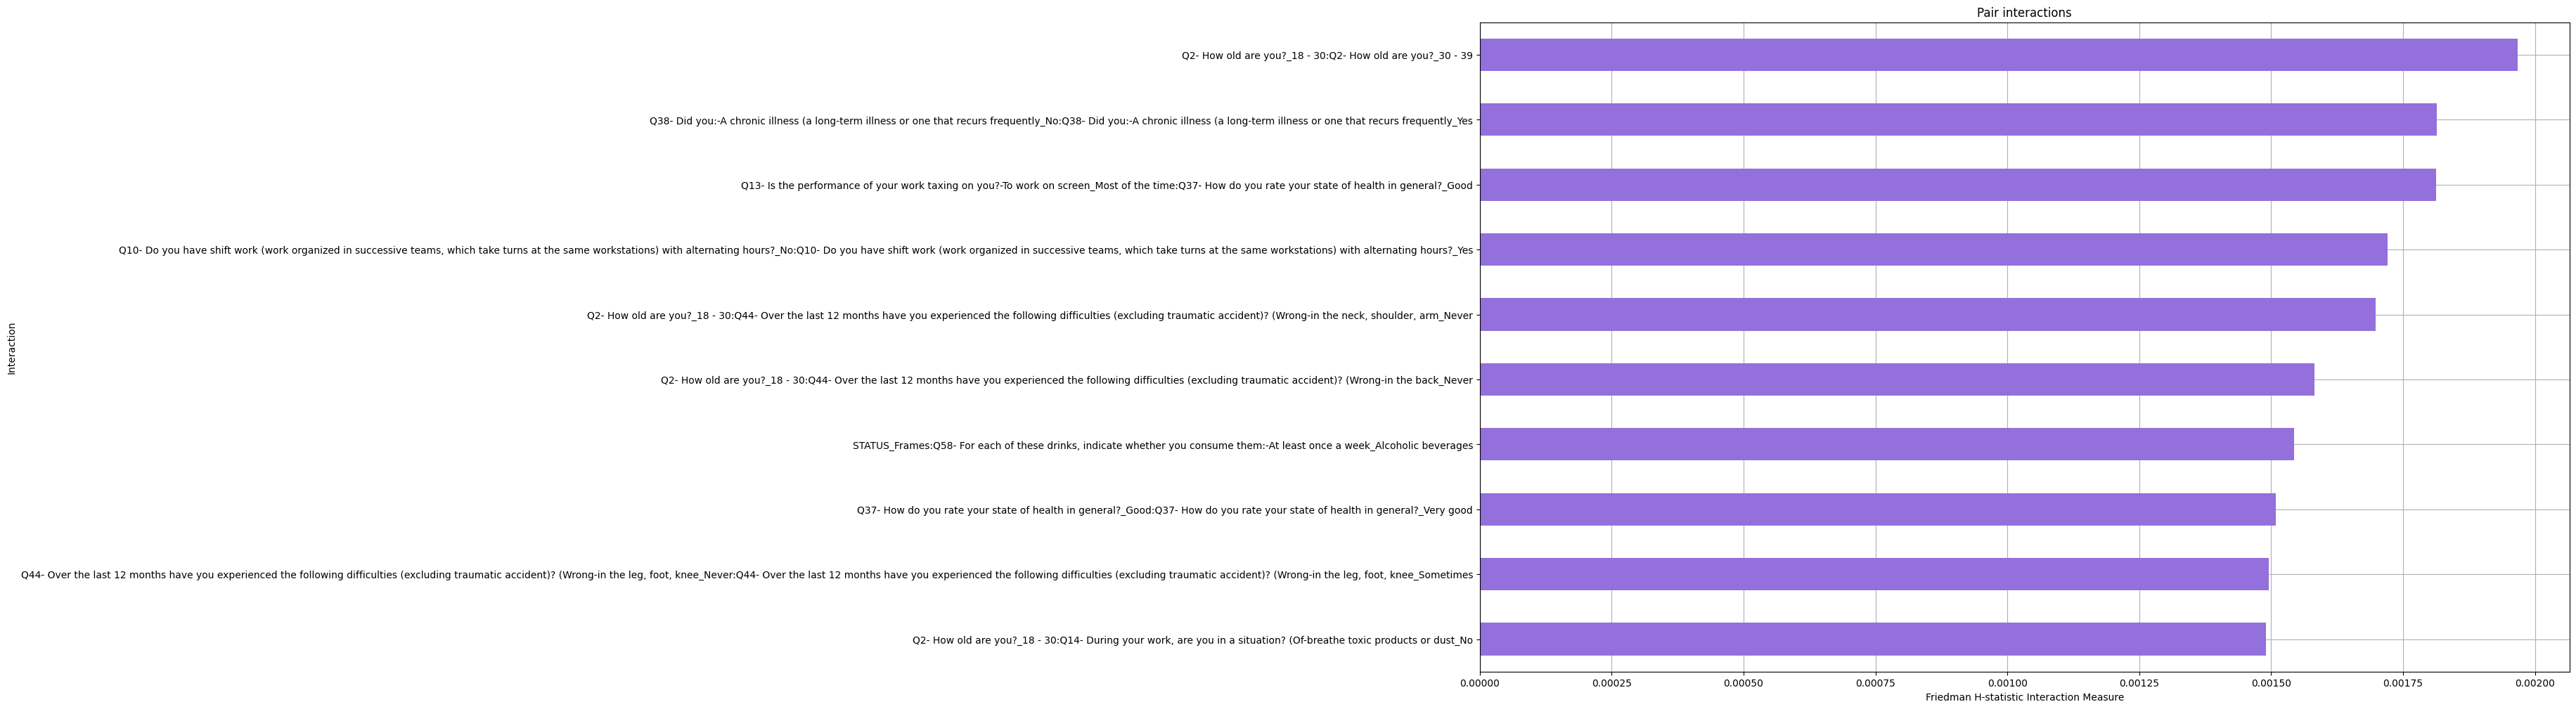

In [14]:
# Plot pairwise interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart', ax=ax)

# save the plot
plt.savefig('outputs/01_02_12_hStat/pairwise_interactions_unnormalised.png', bbox_inches='tight')

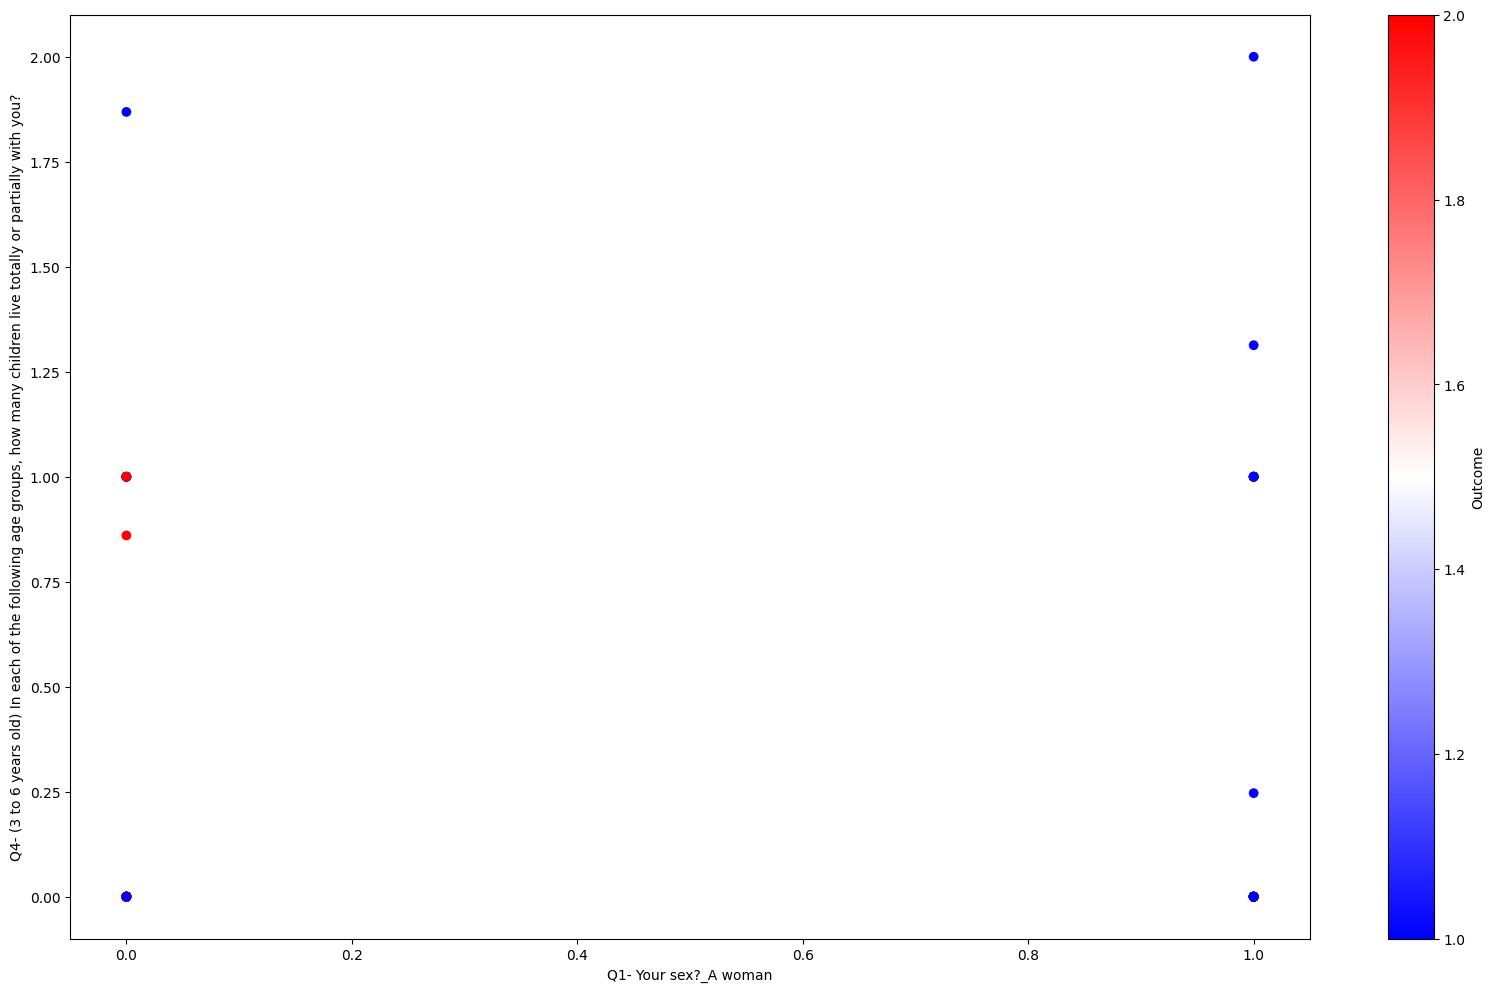

In [15]:
# Interaction between two features
fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(X_exp["Q1- Your sex?_A woman"], X_exp["Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?"], c=y[:100], cmap='bwr')
plt.colorbar(label='Outcome', orientation='vertical')
plt.xlabel("Q1- Your sex?_A woman")
plt.ylabel("Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?")
plt.savefig('outputs/01_02_12_hStat/interaction_between_two_features.png', bbox_inches='tight')
plt.show()

In [16]:
h_stat_unnormalised.feature_importance[0:20]

Feature  Importance
0                        Q2- How old are you?_18 - 30     0.02280
1                                       STATUS_Frames     0.01175
2   Q44- Over the last 12 months have you experien...     0.01060
3   In which sector of activity do you work?_Desig...     0.00950
4   Q38- Did you:-A chronic illness (a long-term i...     0.00945
5                       Q38- Did you:-Disabilities_No     0.00905
6   Q15- Indicate whether each of the following se...     0.00870
7   Q12- Do you work most often?_In an office alon...     0.00865
8   Q14- During your work, are you in a situation?...     0.00850
9   Q13- Is the performance of your work taxing on...     0.00845
10  Q44- Over the last 12 months have you experien...     0.00805
11  Q13- Is the performance of your work taxing on...     0.00795
12  Q13- Is the performance of your work taxing on...     0.00785
13  Q37- How do you rate your state of health in g...     0.00785
14  Q44- Over the last 12 months have you experien...     0.00765
15  Q10- Do you have shift work (work organized in...     0.00760
16  Q13- Is the performance of your work taxing on...     0.00750
17  Q37- How do you rate your state of health in g...     0.00750
18  Would you say that over the last 12 months, yo...     0.00710
19  Q42-During the last 12 months have you had a w...     0.00665